In [2]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/ .kaggle/

cp: cannot stat 'kaggle.json': No such file or directory
cp: -r not specified; omitting directory '/root/'


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.5MB/s]


In [4]:
import matplotlib.pyplot as plt

In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# Generators

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalization convert pixel values in 0 to 1 range

In [8]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label


train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [9]:
# Creating CNN Models

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history= model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
625/625 [==============================] - 76s 104ms/step - loss: 1.0037 - accuracy: 0.6100 - val_loss: 0.7547 - val_accuracy: 0.5720
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5355 - accuracy: 0.7331 - val_loss: 0.5766 - val_accuracy: 0.7166
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4713 - accuracy: 0.7810 - val_loss: 0.4836 - val_accuracy: 0.7750
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3977 - accuracy: 0.8217 - val_loss: 1.2218 - val_accuracy: 0.7158
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3392 - accuracy: 0.8531 - val_loss: 0.4382 - val_accuracy: 0.7984
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2559 - accuracy: 0.8932 - val_loss: 0.5554 - val_accuracy: 0.7616
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1914 - accuracy: 0.9233 - val_loss: 0.6550 - val_ac

In [16]:
import matplotlib.pyplot as plt


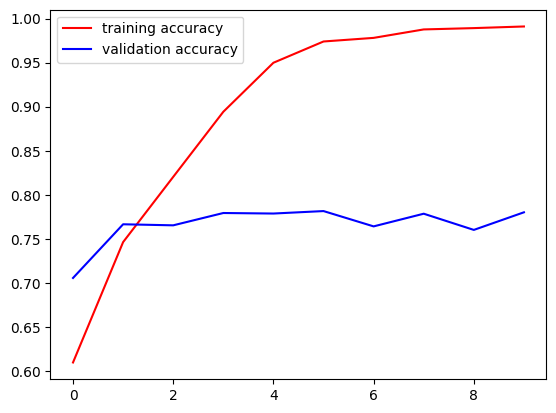

In [17]:
plt.plot(history.history['accuracy'],color='red',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()
# Before batch Normalization and DropOut

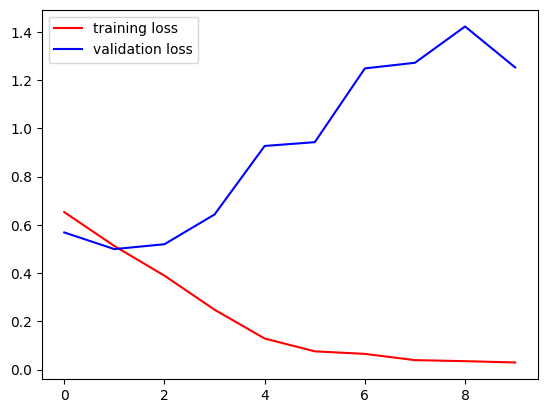

In [19]:
plt.plot(history.history['loss'],color='red',label='training loss')
plt.plot(history.history['val_loss'],color='blue',label='validation loss')
plt.legend()
plt.show()

# Before batch Normalization and DropOut

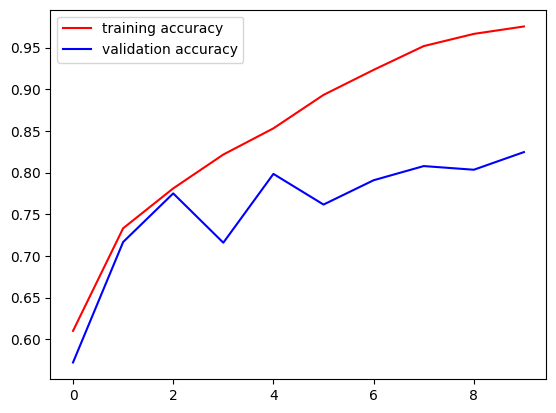

In [15]:
plt.plot(history.history['accuracy'],color='red',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()
# After batch Normalization and DropOut

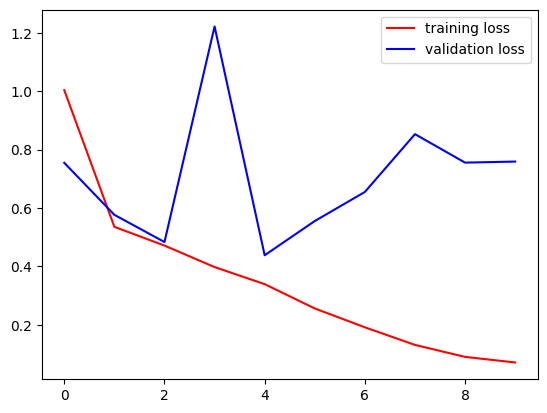

In [16]:
plt.plot(history.history['loss'],color='red',label='training loss')
plt.plot(history.history['val_loss'],color='blue',label='validation loss')
plt.legend()
plt.show()

# After batch Normalization and DropOut

In [17]:
import cv2

In [18]:
test_img=cv2.imread('/content/cat.10.jpg')

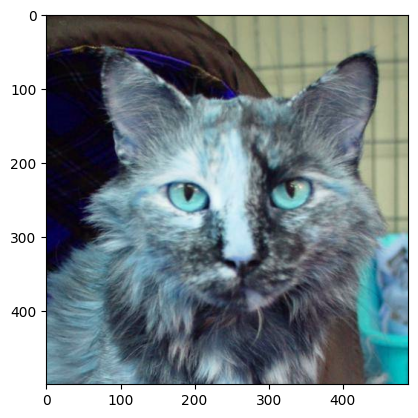

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(499, 489, 3)

In [21]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
test_img.shape

(256, 256, 3)

In [23]:
test_input=test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 411ms/step


array([[0.]], dtype=float32)

In [50]:
new_dog=cv2.imread('/content/dog.10249.jpg')

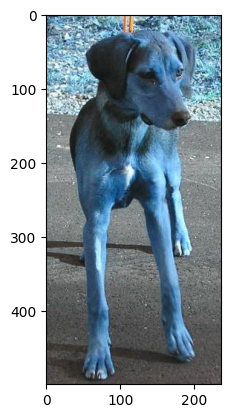

In [51]:
plt.imshow(new_dog)

In [52]:
new_dog.shape

(500, 237, 3)

In [53]:
new_dog1=cv2.resize(new_dog,(256,256))

In [54]:
new_dog1.shape

(256, 256, 3)

In [55]:
testing=new_dog1.reshape((1,256,256,3))

In [56]:
model.predict(testing)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)